In [9]:
import numpy as np
from numpy import linalg as LA
from scipy import spatial as spat
from scipy import interpolate as interp
import itertools as itert
from scipy import special as spec
import matplotlib as mpl
from matplotlib import pyplot as plt
import networkx as nx
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{braket}')
mpl.rcParams.update({'font.size': 22})
col_list=(plt.rcParams['axes.prop_cycle'].by_key()['color'])

### On commence par numéroter chaque intersection et chaque ligne du dessin original

![Numérotation des lignes](./line_label.png)

![Numérotation des interections](./node_label.png)

### Pour chaque ligne du graphe, on liste tous les points (les intersections) qui sont dessus, dans l'exemple donné on a 7 lignes différentes et onze points distincts

In [46]:
line_list=[]

# Sur la première ligne on a les points 0,1 et 5
line_list.append(np.array([0,1,5],dtype=int))
# Sur la deuxième ligne on a les points 0, 2, 6 et 8
line_list.append(np.array([0,2,6,8],dtype=int))
# Et on continue pour les autres lignes...
line_list.append(np.array([0,3,7,9],dtype=int))
line_list.append(np.array([0,4,10],dtype=int))
line_list.append(np.array([1,2,3,4],dtype=int))
line_list.append(np.array([5,6,7,4],dtype=int))
line_list.append(np.array([5,8,9,10],dtype=int))

### Grace à ces données, on créée une matrice $A$ de taille 11x11 (nombre de points). L'entrée $A_{i,j}$ vaut 1 si les deux points $i$ et $j$ sont reliés par une ligne droite et 0 sinon

In [4]:
A=np.zeros((11,11),dtype=int)

nb_elem=len(line_list)
for ii in range(0,nb_elem) :
    idx_pairs=np.array(list(itert.combinations(line_list[ii],2)))
    A[idx_pairs[:,0],idx_pairs[:,1]]=1
    
A+=A.T

### La matrice vaut alors :

In [12]:
print(A)

[[0 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 0 0 0 0 0]
 [1 1 0 1 1 0 1 0 1 0 0]
 [1 1 1 0 1 0 0 1 0 1 0]
 [1 1 1 1 0 1 1 1 0 0 1]
 [1 1 0 0 1 0 1 1 1 1 1]
 [1 0 1 0 1 1 0 1 1 0 0]
 [1 0 0 1 1 1 1 0 0 1 0]
 [1 0 1 0 0 1 1 0 0 1 1]
 [1 0 0 1 0 1 0 1 1 0 1]
 [1 0 0 0 1 1 0 0 1 1 0]]


### Cette matrice définit un nouveau graphe. Chaque point de ce nouveau graphe est un point de la figure de base. Mais deux points sont reliés par un trait si et seulement ils sont reliés par une ligne droite dans la figure originale.

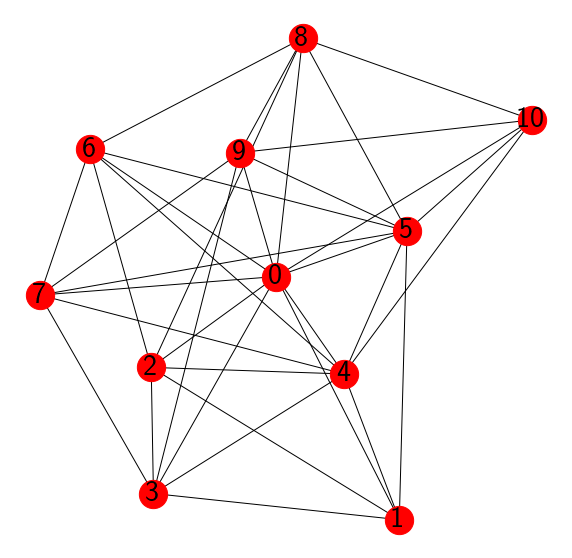

In [27]:
plt.subplots(figsize=(10,10))
G=nx.from_numpy_array(A)
pos=nx.spring_layout(G)
nx.draw(G,pos,node_size=800,node_color='r')
nx.draw_networkx_labels(G,pos,font_size=30);

### Chaque triangle dans ce graphe correspond soit à un "vrai" triangle, soit à trois points sur la même ligne.

### Compter le nombre de triangles dans ce graphe est simple. Un théorème mathématique nous dit que le nombre de triangles est égal à un sixième de la trace (la somme des éléments diagonaux) de la matrice $A$ au cube. Par "matrice au cube" on entend ici $A\times A \times A$, où $\times$ dénote le produit matriciel. Ce calcul nous donne :

In [37]:
total_tri=int(np.trace(LA.matrix_power(A,3))/6)
print(total_tri)

46


### Pour obtenir le bon résultat il nous encore soustraire le nombre de faux triangles qui correpondent simplement à trois points sur un même ligne. Mais pour chaque ligne le nombre de ces faux triangles est facile à calculer. Une ligne avec $k$ points donne $\frac{k(k-1)(k-2)}{6}$ faux triangles. On fait donc le compte pour chaque ligne et on obtient 

In [40]:
line_tri=0

nb_elem=len(line_list)
for ii in range(0,nb_elem) :
    line_tri+=spec.binom(line_list[ii].size,3)
    print('Ligne {0}, {1} points : {2} faux triangle(s)'.format(ii+1,line_list[ii].size, int(spec.binom(line_list[ii].size,3))))

line_tri=int(line_tri)
print('Nombre total de faux triangles : {0}'.format(line_tri))

Ligne 1, 3 points : 1 faux triangle(s)
Ligne 2, 4 points : 4 faux triangle(s)
Ligne 3, 4 points : 4 faux triangle(s)
Ligne 4, 3 points : 1 faux triangle(s)
Ligne 5, 4 points : 4 faux triangle(s)
Ligne 6, 4 points : 4 faux triangle(s)
Ligne 7, 4 points : 4 faux triangle(s)
Nombre total de faux triangles : 22


### Le résultat final s'obtient en soustrayxant le nombre de faux triangles au nombre total de triangles dans le "nouveau graphe". On obtient alors :

In [47]:
print(int(total_tri-line_tri))

24


# Définition formelle

### Considérons un dessin composé uniquement de lignes droites distinctes. Dénotons par $l$ le nombre de lignes droites, et par $N$ le nombre d'intersections entre ces lignes. Numérotons chaque ligne par un indice de 1 à $l$ et chaque interesction par un indice de 1 à $N$

### Soient $S_i,\ i=1$ à $l$,  des ensembles comprenants des nombres entier allant de 1 à $N$. Le nombre $n$ est compris dans l'ensemble $S_i$ si et seulement si la ligne $l$ passe par l'intersection $n$.

### Soit $A$ une matrice de taille $N \times N$ dont les entrées valents 0 ou 1 ($A\in M_{N\times N}(\mathbf{Z}_2)$). On définit les éléments de cette matrice comme $A_{i,j}=1$ s'il existe un set $S_k$ tel quel $i$ et $j$ sont tous les deux inclus dans $S_k$, et 0 sinon (1 si $i$ et $j$ sont reliés par une ligne droite et 0 sinon).

### Alors le nombre triangles dans le dessin original est donné par
### $\# \text{Triangles}=\frac{1}{6}\text{Tr}\left(A^3 \right)-\sum_{i=1}^l \frac{|S_i|(|S_i|-1)(|S_i|-2)}{6},$
### où $|S_i|$ dénote la cardinalité du set $i$, c'est à dire le nombre d'éléments qu'il contient.

# Code en version courte

In [42]:
B=np.zeros((11,11),dtype=int)
B_tri=0

for ii in line_list :
    idx_pairs=np.array(list(itert.combinations(ii,2)))
    B_tri+=spec.binom(ii.size,3)
    B[idx_pairs[:,0],idx_pairs[:,1]]=1
    
B+=B.T

print(int(np.trace(LA.matrix_power(B,3))/6-B_tri))

24


### Au final le code est assez facile à écrire, la partie compliquée c'est de passer du dessin aux ensembles de points qui correpondent aux lignes. Je suis sûr qu'avec des images noir/blanc il existe des algorithmes qui font ça très bien mais c'est pas mon rayon. Mais sinon je ne vois pas trop comment définir le dessin "mathématiquement" à part avec ces ensembles de points.

### Il y a probalement des méthodes plus simples pour faire les choses "à la main", mais je ne pense pas qu'elle soit ausi simples mathématiquement.

# Deuxième exemple pour le principe

![Exemple 2](./ex_2.png)

In [52]:
# On prend les mêmes et on recommence...

line_list2=[]

line_list2.append(np.array([0,1,2,3],dtype=int))
line_list2.append(np.array([0,4,7,10],dtype=int))
line_list2.append(np.array([1,5,8,10],dtype=int))
line_list2.append(np.array([2,6,9,10],dtype=int))
line_list2.append(np.array([3,4,5,6],dtype=int))
line_list2.append(np.array([3,7,8,9],dtype=int))
line_list2.append(np.array([3,10],dtype=int))

In [53]:
C=np.zeros((11,11),dtype=int)
C_tri=0

for ii in line_list2 :
    idx_pairs=np.array(list(itert.combinations(ii,2)))
    C_tri+=spec.binom(ii.size,3)
    C[idx_pairs[:,0],idx_pairs[:,1]]=1
    
C+=C.T

print(int(np.trace(LA.matrix_power(C,3))/6-C_tri))

27


### Et on retrouve la bonne valeur de 27 triangles (voir https://donsteward.blogspot.com/2013/02/systematic-counting-of-triangles.html)